# UFC Retirement Age - Data Wrangling<a id='2_Data_wrangling'></a>

## 1. Contents<a id='1_Contents'></a>
* [1 Contents](#_UFC_Retirement_Age_-_Data_Wrangling)
* [2 Data Collection](#_UFC_Retirement_Age_-_Data_Wrangling)
* [3 Data Organization](#_UFC_Retirement_Age_-_Data_Wrangling)
* [4_Data Definition](#_UFC_Retirement_Age_-_Data_Wrangling)
* [5_Data Cleaning](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.1 Remove unnecessary columns](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.2 Transform DataFrame](#_UFC_Retirement_Age_-_Data_Wrangling)
 * [5.3 Remove Null values](#_UFC_Retirement_Age_-_Data_Wrangling)

## 2. Data Collection<a id='2.2_Introduction'></a>

**Goal: Organize your data to streamline the next steps of your capstone.**

First, all libraries required for this project will be imported.

In [246]:
from kaggle.api.kaggle_api_extended import KaggleApi
import kaggle as kg
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from zipfile import ZipFile

Using the Kaggle API, the necessary dataset is imported as a Pandas DataFrame and previewed.

In [247]:
api = KaggleApi()
api.authenticate()
api.dataset_download_file('rajeevw/ufcdata', 'data.csv')
zf = ZipFile('255092%2F536001%2Fcompressed%2Fdata.csv.zip')
zf.extractall()
zf.close()
ufc = pd.read_csv('data.csv')
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [248]:
ufc.shape

(5144, 145)

## 3. Data Organization<a id='2.2_Introduction'></a>

**Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.**

This notebook, along with the rest of the notebooks for this capstone project, will be uploaded to GitHub in a proper repository.

## 4. Data Definition<a id='2.2_Introduction'></a>

**Goal: Gain an understanding of your data features to inform the next steps of your project.**

To begin cleaning up my data, I will first examine the columns in the dataset.

In [249]:
ufc.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 145, dtype: object

Since there are a lot of columns, I will check the columns that belong to each data type. Even though I won't be able to examine every single column, hopefully the columns will have the appropriate data type at a glance.

In [250]:
ufc.dtypes[ufc.dtypes == object]

R_fighter       object
B_fighter       object
Referee         object
date            object
location        object
Winner          object
weight_class    object
B_Stance        object
R_Stance        object
dtype: object

In [251]:
ufc.dtypes[ufc.dtypes == 'float64']

B_current_lose_streak    float64
B_current_win_streak     float64
B_draw                   float64
B_avg_BODY_att           float64
B_avg_BODY_landed        float64
                          ...   
R_Height_cms             float64
R_Reach_cms              float64
R_Weight_lbs             float64
B_age                    float64
R_age                    float64
Length: 134, dtype: object

In [252]:
ufc.dtypes[(ufc.dtypes != 'object') & (ufc.dtypes != 'float64')]

title_bout       bool
no_of_rounds    int64
dtype: object

With all the datatypes accounted for, it looks like each column has the proper datatype for its data. If this is not the case, it can be dealt with later on. Each column has also been properly named. As of now, there are no more major changes that need to be made for this step. 

## 5. Data Cleaning<a id='2.2_Introduction'></a>

**Goal: Clean up the data in order to prepare it for the next steps of your project.**

### 5.1 Remove unnecessary columns

There are several columns in this dataset that will most likely not be needed for this project. Those will first be preserved in a separate DataFrame, then removed from the main one. For example, the location and referee for each fight will likely not be relevant to this analysis. 

In [253]:
del_col_names = ['Referee', 'location']
ufc_del = ufc[del_col_names]
ufc.drop(ufc_del, axis=1, inplace=True)
pd.Series(['Referee', 'location']).isin(ufc.columns).all()

False

### 5.2 Transform DataFrame

Next, it's time to find any Null values and decide whether to drop them or impute them. I begin this task by setting the index for this DataFrame.

In [254]:
ufc = ufc.set_index(['date'], drop=True)

Then, I will check the amount of NaN values in the dataset.

In [255]:
ufc.isnull().sum().sum()

95367

In [256]:
null_rows = ufc.isnull().sum(axis=1)
null_rows = null_rows[null_rows > 0].sort_values(ascending=False)
print('Rows with at least one Null value:', str(null_rows.count()))

Rows with at least one Null value: 1929


In [257]:
null_cols = ufc.isnull().sum(axis=0)
null_cols = null_cols[null_cols > 0].sort_values(ascending=False)
print('Columns with at least one Null value:', str(null_cols.count()))

Columns with at least one Null value: 108


There seem to be a lot of Null values, so inspecing the distribution of Null values may shed some light on this problem.

In [258]:
null_rows.head()

date
1997-05-30    108
1994-03-11    106
1997-07-27    105
1999-01-08    104
1996-07-12    104
dtype: int64

In [259]:
null_cols.head()

B_avg_BODY_att               1265
B_avg_opp_PASS               1265
B_avg_opp_CLINCH_landed      1265
B_avg_opp_DISTANCE_att       1265
B_avg_opp_DISTANCE_landed    1265
dtype: int64

It seems like most of the Null values might have been the result of insufficient information during the earlier days of the UFC, also known as the UFC's "Dark Ages." To verify this, I will plot the distribution of Null values in the DataFrame sorted by date.

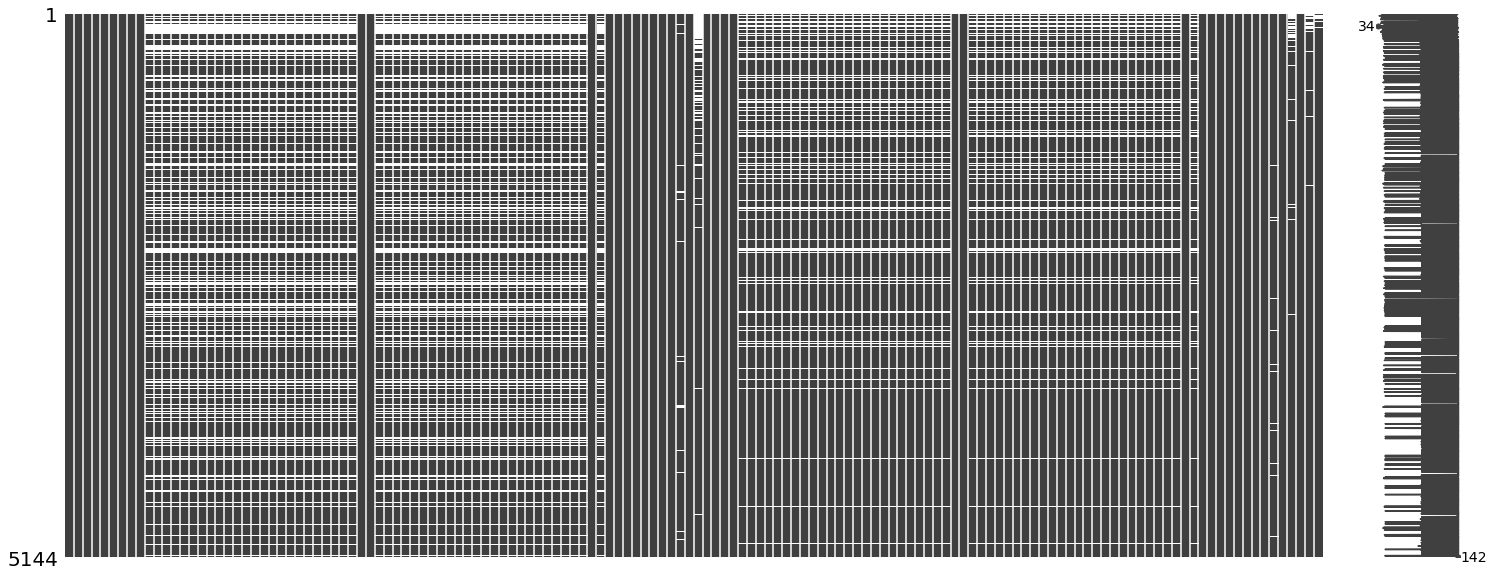

In [260]:
msno.matrix(ufc.sort_values(by='date'))

The Null values seem to be distributed more evenly than I thought they were when sorted by date. However, the Null values are disproportionately distributed between the Red and Blue corner fighters. Since it would make the exploratory analysis simpler, I will transform the DataFrame so that each row corresponds to one fighter instead of one fight. This way, I will have less columns, but more rows. This will also make it easier to remove rows with missing data for one fighter without removing data for the other fighter as well. I will do this by creating 2 DataFrames, one for Red fighters and one for Blue fighters, then merging them.

In [267]:
red_cols = [col for col in ufc.columns if not col.startswith('B')]
red_fighters = ufc[red_cols]
red_fighters.head()

,R_fighter,Winner,title_bout,weight_class,no_of_rounds,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
date,,,,,,,,,,,,,,,,,,,,,
2019-06-08,Henry Cejudo,Red,True,Bantamweight,5,0.0,4.0,0.0,21.900000,16.400000,...,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0
2019-06-08,Valentina Shevchenko,Red,True,Women's Flyweight,5,0.0,2.0,0.0,12.000000,7.714286,...,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0
2019-06-08,Tony Ferguson,Red,False,Lightweight,3,0.0,11.0,0.0,13.866667,8.666667,...,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0
2019-06-08,Jimmie Rivera,Blue,False,Bantamweight,3,1.0,0.0,0.0,18.250000,10.250000,...,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0
2019-06-08,Tai Tuivasa,Blue,False,Heavyweight,3,1.0,0.0,0.0,7.750000,6.750000,...,1.0,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,26.0


In [268]:
blue_cols = [col for col in ufc.columns if not col.startswith('R')]
blue_fighters = ufc[blue_cols]
blue_fighters.head()

,B_fighter,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,...,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age
date,,,,,,,,,,,,,,,,,,,,,
2019-06-08,Marlon Moraes,Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,...,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0
2019-06-08,Jessica Eye,Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,...,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0
2019-06-08,Donald Cerrone,Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,...,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,36.0
2019-06-08,Petr Yan,Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,...,2.0,2.0,0.0,0.0,4.0,Switch,170.18,170.18,135.0,26.0
2019-06-08,Blagoy Ivanov,Blue,False,Heavyweight,3,0.0,1.0,0.0,17.000000,14.500000,...,1.0,0.0,0.0,0.0,1.0,Southpaw,180.34,185.42,250.0,32.0


In [291]:
neutral_cols = [col[2:]  if col.startswith('R') else col for col in red_fighters.columns ]
neutral_cols

['fighter',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'current_lose_streak',
 'current_win_streak',
 'draw',
 'avg_BODY_att',
 'avg_BODY_landed',
 'avg_CLINCH_att',
 'avg_CLINCH_landed',
 'avg_DISTANCE_att',
 'avg_DISTANCE_landed',
 'avg_GROUND_att',
 'avg_GROUND_landed',
 'avg_HEAD_att',
 'avg_HEAD_landed',
 'avg_KD',
 'avg_LEG_att',
 'avg_LEG_landed',
 'avg_PASS',
 'avg_REV',
 'avg_SIG_STR_att',
 'avg_SIG_STR_landed',
 'avg_SIG_STR_pct',
 'avg_SUB_ATT',
 'avg_TD_att',
 'avg_TD_landed',
 'avg_TD_pct',
 'avg_TOTAL_STR_att',
 'avg_TOTAL_STR_landed',
 'longest_win_streak',
 'losses',
 'avg_opp_BODY_att',
 'avg_opp_BODY_landed',
 'avg_opp_CLINCH_att',
 'avg_opp_CLINCH_landed',
 'avg_opp_DISTANCE_att',
 'avg_opp_DISTANCE_landed',
 'avg_opp_GROUND_att',
 'avg_opp_GROUND_landed',
 'avg_opp_HEAD_att',
 'avg_opp_HEAD_landed',
 'avg_opp_KD',
 'avg_opp_LEG_att',
 'avg_opp_LEG_landed',
 'avg_opp_PASS',
 'avg_opp_REV',
 'avg_opp_SIG_STR_att',
 'avg_opp_SIG_STR_landed',
 'avg_opp

I will merge the 2 DataFrames with these neutral columns, but first I have to change the values in the Winner columns. This will help me in my analysis later on.

In [299]:
red_fighters['Winner'] = [winner == 'Red' for winner in red_fighters['Winner']]
red_fighters.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fighter,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
date,,,,,,,,,,,,,,,,,,,,,
2019-06-08,Henry Cejudo,False,True,Bantamweight,5,0.0,4.0,0.0,21.900000,16.400000,...,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0
2019-06-08,Valentina Shevchenko,False,True,Women's Flyweight,5,0.0,2.0,0.0,12.000000,7.714286,...,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0
2019-06-08,Tony Ferguson,False,False,Lightweight,3,0.0,11.0,0.0,13.866667,8.666667,...,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0
2019-06-08,Jimmie Rivera,False,False,Bantamweight,3,1.0,0.0,0.0,18.250000,10.250000,...,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0
2019-06-08,Tai Tuivasa,False,False,Heavyweight,3,1.0,0.0,0.0,7.750000,6.750000,...,1.0,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,26.0


In [300]:
blue_fighters['Winner'] = [winner == 'Blue' for winner in blue_fighters['Winner']]
blue_fighters.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fighter,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
date,,,,,,,,,,,,,,,,,,,,,
2019-06-08,Marlon Moraes,False,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,...,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0
2019-06-08,Jessica Eye,False,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,...,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0
2019-06-08,Donald Cerrone,False,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,...,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,36.0
2019-06-08,Petr Yan,True,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,...,2.0,2.0,0.0,0.0,4.0,Switch,170.18,170.18,135.0,26.0
2019-06-08,Blagoy Ivanov,True,False,Heavyweight,3,0.0,1.0,0.0,17.000000,14.500000,...,1.0,0.0,0.0,0.0,1.0,Southpaw,180.34,185.42,250.0,32.0


In [316]:
red_fighters.columns = neutral_cols
blue_fighters.columns = neutral_cols
df = pd.concat([red_fighters, blue_fighters])
df.shape

(10288, 73)

### 5.2 Remove Null Values

Now that each row represents one fighter, removing one row for not having a fighter's age would not involve collateral removal of another fighter's data. Since age is the most pertinent variable, I will remove rows missing the fighter's age.

In [334]:
df.dropna(subset=['age'], inplace=True)
df.shape

(10052, 72)

In [337]:
print('Rows lost: ' + str(10288 - 10052))

Rows lost: 236


The rest of the DataFrame now contains at least the fighter's name, whether they won the fight on a certain date, and their age. This should be enough to keep the rest of the DataFrame. I will need to create separate DataFrames with no Null values when I conduct further analysis on other fight performance metrics.